# 01. Знакомство с `torch.Tensor`

V 0.1 04.02.2021

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [ ]:
pip install torch


     -------------------------------------- 172.4/172.4 MB 1.1 MB/s eta 0:00:00


In [ ]:
import torch

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [ ]:
chessboard = torch.zeros(8, 8)
chessboard[0] = torch.tensor([-4, -3, -2, -6, -5, -2, -3, -4])
chessboard[1] = torch.tensor([-1] * 8)
chessboard[6] = torch.tensor([1] * 8)
chessboard[7] = torch.tensor([4, 3, 2, 6, 5, 2, 3, 4])

chessboard

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]])

1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [ ]:
even_numbers = torch.arange(2, 21, 2)
odd_numbers = even_numbers + 1
mult = even_numbers * odd_numbers

mult

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])

1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [ ]:
tensor = torch.arange(1, 102, 10).unsqueeze(1) + torch.arange(0, 7)
tensor

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [ ]:
def create_texture_tensor(n, m):
    texture = torch.tensor([[0, 1], [2, 3]])

    result = torch.zeros(n, m, dtype=torch.int32)
    for i in range(n):
        for j in range(m):
            result[i][j] = texture[i % 2][j % 2]

    return result

n = int(input('n: '))
m = int(input('m: '))
result = create_texture_tensor(n, m)
print(result)

n: 4
m: 5
tensor([[0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2]], dtype=torch.int32)


1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

In [ ]:
tensor = 20 * torch.rand(4, 7)

print(tensor)
min_value = tensor.min()
max_value = tensor.max()

a = 1.0 / (max_value - min_value)
b = -a * min_value
normalized_tensor = a * tensor + b

print(normalized_tensor)

tensor([[ 7.8254,  6.7040, 13.6347,  0.2103, 12.3617,  1.7436,  9.7535],
        [ 8.0134,  9.1429,  4.8480,  6.8725,  1.4621, 10.4661,  1.1506],
        [15.2166,  7.3776,  7.8434,  8.0943, 10.6864, 13.5474, 14.8215],
        [18.8479, 17.8137, 18.3146,  5.9347,  7.1713,  7.4464, 10.8474]])
tensor([[0.4086, 0.3484, 0.7203, 0.0000, 0.6520, 0.0823, 0.5120],
        [0.4187, 0.4793, 0.2488, 0.3575, 0.0672, 0.5503, 0.0504],
        [0.8052, 0.3846, 0.4096, 0.4230, 0.5621, 0.7156, 0.7840],
        [1.0000, 0.9445, 0.9714, 0.3071, 0.3735, 0.3882, 0.5707]])


[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в массивах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [ ]:
t1 = torch.randint(0, 11, (4, 7))
t2 = torch.randint(0, 11, (4, 7))
print(t1)
print(t2)
result = torch.max(t1, t2)

print(result)

tensor([[ 6,  1,  0,  3,  0, 10,  3],
        [10,  0,  9,  9,  7,  6,  3],
        [ 3,  8,  3,  6,  2,  3,  1],
        [ 3,  5,  4, 10,  8,  5,  1]])
tensor([[ 9,  4,  4,  5,  5,  2,  8],
        [10,  3, 10,  9,  8,  7,  5],
        [ 4,  3,  2,  4, 10,  0,  0],
        [ 6,  2,  3,  4,  2,  5,  8]])
tensor([[ 9,  4,  4,  5,  5, 10,  8],
        [10,  3, 10,  9,  8,  7,  5],
        [ 4,  8,  3,  6, 10,  3,  1],
        [ 6,  5,  4, 10,  8,  5,  8]])


1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [ ]:
random_tensor = torch.randint(0, 101, (20,))

sorted_tensor, ind = torch.sort(random_tensor, descending=True)

second_highest_value = sorted_tensor[1]

print("Тензор:", random_tensor)
print("Отсортированный тензор:", sorted_tensor)
print("Второе сверху значение:", second_highest_value)
print("Индекс элементов с вторым сверху значением:", ind[1])

Тензор: tensor([56, 85, 75, 76, 30, 81, 75,  3, 27, 15, 94, 98, 47,  7, 95, 12, 92,  0,
         9, 28])
Отсортированный тензор: tensor([98, 95, 94, 92, 85, 81, 76, 75, 75, 56, 47, 30, 28, 27, 15, 12,  9,  7,
         3,  0])
Второе сверху значение: tensor(95)
Индекс элементов с вторым сверху значением: tensor(14)


## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [ ]:
tensor = torch.arange(1, 102, 10).unsqueeze(1) + torch.arange(0, 7)
tensor

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [ ]:
a_2d = torch.tensor([[3, 3, 3], [4, 4, 4], [5, 5, 5]])
b_1d = torch.tensor([1, 2, 3])

result = a_2d - b_1d.view(3, 1)

print(result)

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])


## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
array([1, 3, 5, 7])
```

In [ ]:
a = torch.randint(0, 7, (10,))
b = torch.randint(0, 7, (10,))
print(a, b)
torch.where(a==b)[0]

tensor([3, 0, 3, 6, 1, 5, 2, 3, 0, 0]) tensor([0, 4, 4, 2, 5, 3, 0, 5, 0, 2])


tensor([8])

1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [ ]:
tensor = torch.arange(9).view(3,3)
tensor.flip(1).flip(0)

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = np.array([2, 6, 1, 9, 10, 3, 27])
```

Ожидается резульат:

```python
array([6, 9, 10])
```

In [ ]:
tensor = torch.randint(0, 15, (10, ))
print(tensor)
tensor[(tensor>=5) & (tensor<=10)]

tensor([ 4, 11, 12, 14,  9, 14, 10, 12, 10,  0])


tensor([ 9, 10, 10])

1.3.4 Поменять местами столбец 1 и 2 тензора `np.arange(9).reshape(3,3)`

In [ ]:
tensor = torch.arange(9).reshape(3,3)
print(tensor)
tensor = tensor[:, [1, 0, 2]]

print(tensor)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[1, 0, 2],
        [4, 3, 5],
        [7, 6, 8]])


1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [ ]:
tensor = torch.randint(0, 11, (8, 10))
print(tensor)
sum_row = tensor.sum(dim=1)
print('Сумма элементов в каждой строке:', sum_row)
ind = sum_row.argmin()
print('Индекс строки с минимальной суммой:', ind.item())
print(tensor[ind])

tensor([[ 8,  2,  3,  0,  7,  9,  4,  4, 10, 10],
        [10,  4,  3,  3,  2,  9,  8,  2,  9,  8],
        [ 1,  4,  8,  4,  1,  4,  7,  9,  0,  8],
        [ 9,  1, 10,  0,  7,  5,  3,  6,  3,  2],
        [ 0, 10,  7,  5,  8,  5,  1,  4, 10,  0],
        [ 9,  8,  5, 10,  5,  9,  8,  8,  9,  0],
        [10,  1,  3,  7,  1,  8,  4,  5,  9,  4],
        [ 3,  0,  6,  4,  2,  0,  5,  7,  9,  1]])
Сумма элементов в каждой строке: tensor([57, 58, 46, 46, 50, 71, 52, 37])
Индекс строки с минимальной суммой: 7
tensor([3, 0, 6, 4, 2, 0, 5, 7, 9, 1])


1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [ ]:
tensor = torch.randint(0, 101, (20, ))
print(tensor)
tensor = torch.clamp(tensor, min=30, max=70)
tensor

tensor([93,  6, 83, 61, 62, 87,  7, 17, 55, 17, 99, 12, 75, 60,  5, 46, 71, 40,
        16, 37])


tensor([70, 30, 70, 61, 62, 70, 30, 30, 55, 30, 70, 30, 70, 60, 30, 46, 70, 40,
        30, 37])

1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [ ]:
t1 = torch.randint(0, 11, (30, 3))
t2 = torch.randint(0, 11, (30, 3))
val = t1[t1>t2]
print(val)
sum(val).item()

tensor([10,  8,  6,  9,  8,  9,  3,  9,  5,  7,  6,  7,  9,  9,  9, 10,  9,  9,
         8,  8,  7, 10, 10, 10,  4,  3,  4,  6,  6,  7, 10, 10,  9, 10,  7,  4,
         8, 10,  5,  8,  8,  7,  7,  4,  8,  7,  7,  3, 10])


367

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [ ]:
tensor = torch.randint(0, 11, (20, 20))
row = torch.arange(0, 19)
col = torch.arange(1, 20)
# print(tensor)
diag = tensor[row, col]
diag

tensor([ 4,  5,  6,  8,  4,  0,  5,  3,  8,  2, 10,  2,  2,  7,  3,  5,  6,  9,
         8])

1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [ ]:
ar1 = torch.randint(0, 11, (5, 10))
ar2 = torch.randint(0, 11, (5, 10))
print(ar1)
print(ar2)
ar1[ar1==ar2] *= 2
ar1

tensor([[ 3,  2,  1,  2,  6,  0,  7,  2,  3,  4],
        [ 5,  5,  7, 10, 10,  6,  5,  6,  8,  5],
        [ 7,  2,  8,  8,  2,  5,  6,  1,  9,  5],
        [ 7,  7,  9,  8, 10,  7,  4,  0,  7,  6],
        [ 7,  3, 10,  0,  7,  7, 10,  2,  5,  9]])
tensor([[ 5,  8,  3,  5,  4,  6,  4,  3, 10,  8],
        [ 1, 10,  5,  7,  2,  7, 10,  5,  7,  1],
        [ 4,  0,  6,  8,  4,  8,  4,  5,  5,  1],
        [ 5,  1,  2,  7,  8,  1,  2,  3,  7,  0],
        [ 1,  7,  2,  9,  1,  8,  1, 10,  8,  0]])


tensor([[ 3,  2,  1,  2,  6,  0,  7,  2,  3,  4],
        [ 5,  5,  7, 10, 10,  6,  5,  6,  8,  5],
        [ 7,  2,  8, 16,  2,  5,  6,  1,  9,  5],
        [ 7,  7,  9,  8, 10,  7,  4,  0, 14,  6],
        [ 7,  3, 10,  0,  7,  7, 10,  2,  5,  9]])

1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [ ]:
ar1 = torch.randint(0, 11, (4, 7))
ar2 = torch.randint(0, 11, (4, 7))
ar3 = torch.randint(0, 11, (4, 7))
print(ar1)
print(ar2)
print(ar3)
ar1[(ar1>ar2) & (ar1<ar3)] = 0
ar1

tensor([[ 2,  9,  5,  3, 10,  8,  4],
        [ 5,  0,  6, 10,  2,  3,  0],
        [ 4,  2,  5,  8,  3,  5,  3],
        [ 4,  2,  5,  8, 10,  9, 10]])
tensor([[10,  2,  1, 10,  9,  1,  1],
        [ 5,  2, 10, 10,  1,  6,  8],
        [ 7,  2,  7,  6,  4,  2,  0],
        [ 2,  7,  4,  4,  3,  9,  4]])
tensor([[ 2,  7,  2,  8,  0,  7,  5],
        [ 6,  2, 10,  9,  0,  1,  9],
        [ 4,  6,  9,  3,  8,  9,  5],
        [ 0,  1,  2,  2,  0,  0,  7]])


tensor([[ 2,  9,  5,  3, 10,  8,  0],
        [ 5,  0,  6, 10,  2,  3,  0],
        [ 4,  2,  5,  8,  3,  0,  0],
        [ 4,  2,  5,  8, 10,  9, 10]])

1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [ ]:

ar1 = torch.randint(0, 21, (20, 5))
print(ar1)
max_values, max_indices = torch.max(ar1, dim=1)

# print(max_values.view(-1, 1))
# Создаем маску, которая указывает, в каких столбцах максимальное значение встречается не менее 5 раз
mask = torch.sum(ar1 == max_values.view(-1, 1), dim=0) >= 5

# Получаем индексы столбцов, где условие выполняется
columns_with_condition_met = torch.nonzero(mask).squeeze().tolist()

print("Столбцы, в которых максимальное значение встречается не менее 5 раз:", columns_with_condition_met)


tensor([[ 6, 11,  7, 17,  8],
        [13,  5,  7, 20, 12],
        [12, 12, 10, 18,  7],
        [10, 10,  2,  9, 18],
        [ 7, 18,  0,  5,  8],
        [11, 20,  4,  6, 11],
        [14,  4, 19, 13,  5],
        [ 1, 14, 18,  5, 11],
        [ 2, 10,  3, 19, 18],
        [10, 20,  6, 18, 14],
        [15,  7,  0,  1, 15],
        [19, 17,  8,  9,  0],
        [18,  8,  9, 18,  8],
        [16, 12,  7,  9,  8],
        [13,  1,  5, 19,  0],
        [ 5, 14, 11,  7, 12],
        [18, 14, 13, 10,  5],
        [ 6, 17, 14, 20, 18],
        [18,  3, 11, 13, 17],
        [ 3,  1, 14, 18,  8]])
Столбцы, в которых максимальное значение встречается не менее 5 раз: [0, 3]


1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива.

In [ ]:
ar1 = torch.rand(4, 7)
print(ar1)
max_ind= torch.argmax(ar1)
max_coords = [(max_ind // ar1.shape[1]).tolist(), (max_ind % ar1.shape[1]).tolist()]
print('Координаты макс числа:', max_coords)
ar1[max_coords[0]:, max_coords[1]+1:] = 0
ar1[max_coords[0]+1:, max_coords[1]] = 0
print(ar1)

tensor([[0.0471, 0.6598, 0.7108, 0.1684, 0.3774, 0.6696, 0.6458],
        [0.5996, 0.6527, 0.9410, 0.3968, 0.2812, 0.4318, 0.0055],
        [0.7555, 0.9402, 0.0920, 0.5265, 0.9625, 0.2357, 0.1120],
        [0.4104, 0.4305, 0.5332, 0.8102, 0.1490, 0.2012, 0.4725]])
Координаты макс числа: [2, 4]
tensor([[0.0471, 0.6598, 0.7108, 0.1684, 0.3774, 0.6696, 0.6458],
        [0.5996, 0.6527, 0.9410, 0.3968, 0.2812, 0.4318, 0.0055],
        [0.7555, 0.9402, 0.0920, 0.5265, 0.9625, 0.0000, 0.0000],
        [0.4104, 0.4305, 0.5332, 0.8102, 0.0000, 0.0000, 0.0000]])


1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [ ]:
tensor = torch.randint(0, 4, (5,))
print(tensor)
num_classes = tensor.unique().size()[0]

ohe_tensor = torch.zeros(tensor.size()[0], tensor.unique().size()[0])
for i, element in enumerate(tensor.unique()):
    ohe_tensor[:, i] = torch.where(tensor == element, 1, 0)
ohe_tensor

tensor([0, 1, 3, 3, 3])


tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре.
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая.

In [ ]:
arr = torch.randint(0, 101, (20, ))
print(arr)
most_common_value = arr.mode().values.item()
print(most_common_value)
torch.nonzero(arr == most_common_value).squeeze()

tensor([73, 92, 10, 43, 65,  9, 81, 22, 25, 75, 45, 47, 27, 84, 99, 95, 98, 47,
        74, 57])
47


tensor([11, 17])

## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [ ]:
import math

x = torch.linspace(0, 10, 10000)

y = x * torch.sin(x)

count = torch.sum(y > 0.5).item()
fraction = count / len(x)
fraction

0.5241

1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

In [ ]:
max_number = 100

is_prime = torch.ones(max_number + 1, dtype=torch.bool)

is_prime[0:2] = False

current_prime = 2

while current_prime * current_prime <= max_number:
    if is_prime[current_prime]:
        is_prime[current_prime * current_prime::current_prime] = False
    current_prime += 1

prime_numbers = torch.nonzero(is_prime).squeeze().tolist()

print("Простые числа в пределах ста:", prime_numbers)

Простые числа в пределах ста: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [ ]:
tensor1 = torch.tensor([0, 0, 0])
tensor2 = torch.tensor([3, 3, 3])

euc_distance = torch.sqrt(torch.sum(torch.square(tensor1 - tensor2)))
euc_distance.item()

5.196152210235596

1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100.
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

In [ ]:
tensor = torch.randint(0, 101, (20, 3))

print(tensor)
vector_lengths = torch.norm(tensor.to(torch.float64), dim=1)
sorted_indices = torch.argsort(vector_lengths)

sorted_tensor = tensor[sorted_indices]

print("Отсортированный тензор по длине векторов:\n", sorted_tensor)

tensor([[ 48,  38,   9],
        [ 93,   9,  89],
        [ 26,  37,  11],
        [ 25,  80,  11],
        [ 59,  33,  75],
        [ 53,  47,   8],
        [ 22,  32,  90],
        [ 10,  23,  54],
        [ 68,  50,   9],
        [ 41,  85,  11],
        [  8,  49,  47],
        [100,   3,  22],
        [ 11,   5,  68],
        [ 89,   7,  58],
        [ 24,  89,  13],
        [ 70,  15,   2],
        [ 18,  20,  49],
        [ 63,   5,  34],
        [ 63,  12, 100],
        [ 82,  89,  68]])
Отсортированный тензор по длине векторов:
 tensor([[ 26,  37,  11],
        [ 18,  20,  49],
        [ 10,  23,  54],
        [ 48,  38,   9],
        [  8,  49,  47],
        [ 11,   5,  68],
        [ 53,  47,   8],
        [ 70,  15,   2],
        [ 63,   5,  34],
        [ 25,  80,  11],
        [ 68,  50,   9],
        [ 24,  89,  13],
        [ 41,  85,  11],
        [ 22,  32,  90],
        [ 59,  33,  75],
        [100,   3,  22],
        [ 89,   7,  58],
        [ 63,  12, 100],
      

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

In [ ]:
tensor = torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])

local_max_indices = (tensor > torch.cat((tensor[:1], tensor[:-1]))) & (tensor > torch.cat((tensor[1:], tensor[-1:])))
torch.nonzero(local_max_indices).squeeze()

tensor([2, 5])

1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [ ]:
random_tensor = torch.rand(100)

target_number = 0.75
print(random_tensor)
closest_index = torch.abs(random_tensor - target_number).argmin()
closest_value = random_tensor[closest_index]
closest_value.item()

tensor([0.9377, 0.0183, 0.5965, 0.0968, 0.8238, 0.0727, 0.0953, 0.5258, 0.0603,
        0.3697, 0.1285, 0.0479, 0.0076, 0.8157, 0.8678, 0.9132, 0.5215, 0.5340,
        0.5199, 0.2772, 0.3989, 0.6399, 0.2950, 0.4100, 0.1255, 0.7963, 0.0583,
        0.9118, 0.7411, 0.1939, 0.6435, 0.5313, 0.4829, 0.2161, 0.4617, 0.1470,
        0.6883, 0.3319, 0.3831, 0.3991, 0.7669, 0.7089, 0.9850, 0.6398, 0.5387,
        0.1609, 0.5247, 0.6422, 0.9384, 0.2688, 0.1154, 0.5261, 0.3984, 0.1402,
        0.9204, 0.7553, 0.1843, 0.0552, 0.7319, 0.6616, 0.4554, 0.1785, 0.3558,
        0.0631, 0.1442, 0.8434, 0.6744, 0.4646, 0.2520, 0.0547, 0.5388, 0.1827,
        0.6442, 0.6789, 0.4148, 0.0595, 0.3182, 0.0590, 0.7263, 0.8291, 0.8408,
        0.8884, 0.5651, 0.4479, 0.6144, 0.1716, 0.3990, 0.9960, 0.7940, 0.1317,
        0.2384, 0.8779, 0.9306, 0.5166, 0.3805, 0.0800, 0.5944, 0.6377, 0.4518,
        0.0760])


0.7552891373634338

1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [ ]:
A = torch.tensor([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]], dtype=torch.float)
B = torch.tensor([[3, -1], [2, 1]], dtype=torch.float)
C = torch.tensor([[7, 21], [11, 8], [8, 4]], dtype=torch.float)

X = torch.matmul(torch.matmul(torch.inverse(A), -C), torch.inverse(B))
print(X)

tensor([[ 1.0000e+00, -1.1921e-07],
        [-2.0000e+00,  1.0000e+00],
        [ 3.0000e+00, -4.0000e+00]])


1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

In [ ]:
a1 = torch.tensor([3, -3, 0, 7], dtype=torch.float)
a2 = torch.tensor([2, 2, 4, 7], dtype=torch.float)
a3 = torch.tensor([1, 2, 3, 4], dtype=torch.float)
a4 = torch.tensor([5, -4, 1, 3], dtype=torch.float)

matrix = torch.stack([a1, a2, a3, a4])

rank = torch.linalg.matrix_rank(matrix)

if rank == matrix.shape[0]:
    print("Система векторов линейно независима.")
else:
    print("Система векторов линейно зависима.")

Система векторов линейно зависима.


1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами.

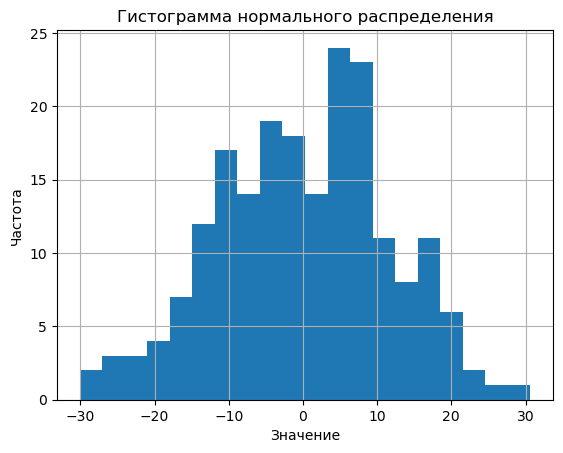

In [ ]:
import matplotlib.pyplot as plt

mu = 0
sigma = 10
num_samples = 200

random_numbers = torch.normal(mu, sigma, size=(num_samples,))

plt.hist(random_numbers, bins=20)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма нормального распределения')
plt.grid(True)

plt.show()